In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

In [2]:
SEED = 42

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

/opt/conda/envs/detection/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], random_state=SEED)
x_train.shape, x_test.shape

/opt/conda/envs/detection/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


((379, 13), (127, 13))

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

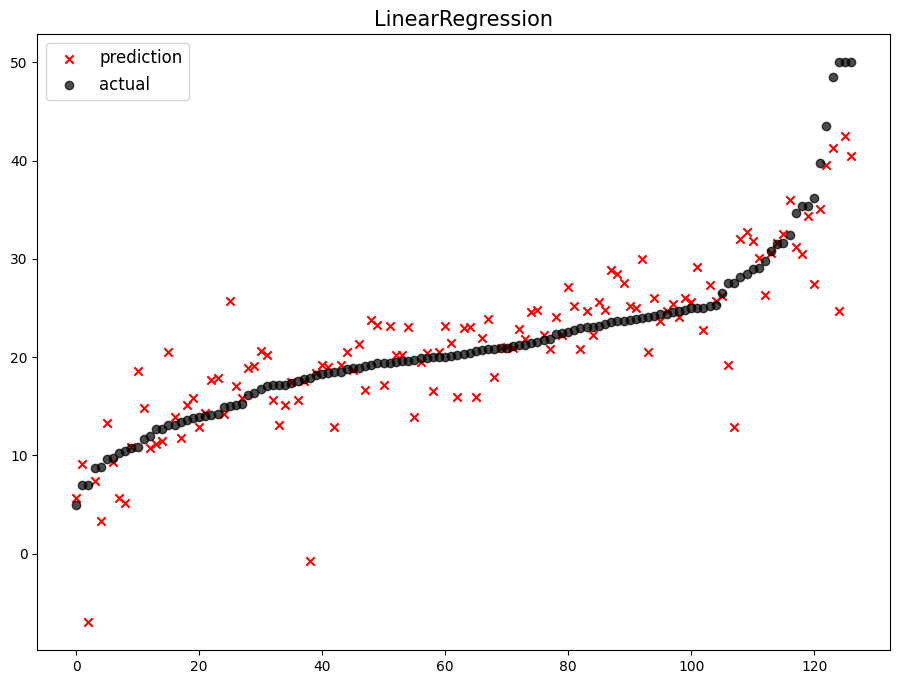

              model        mse
0  LinearRegression  22.098695


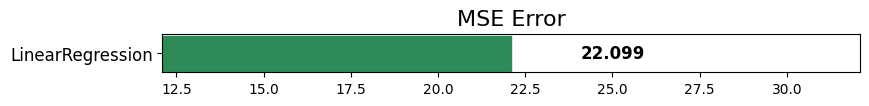

In [9]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

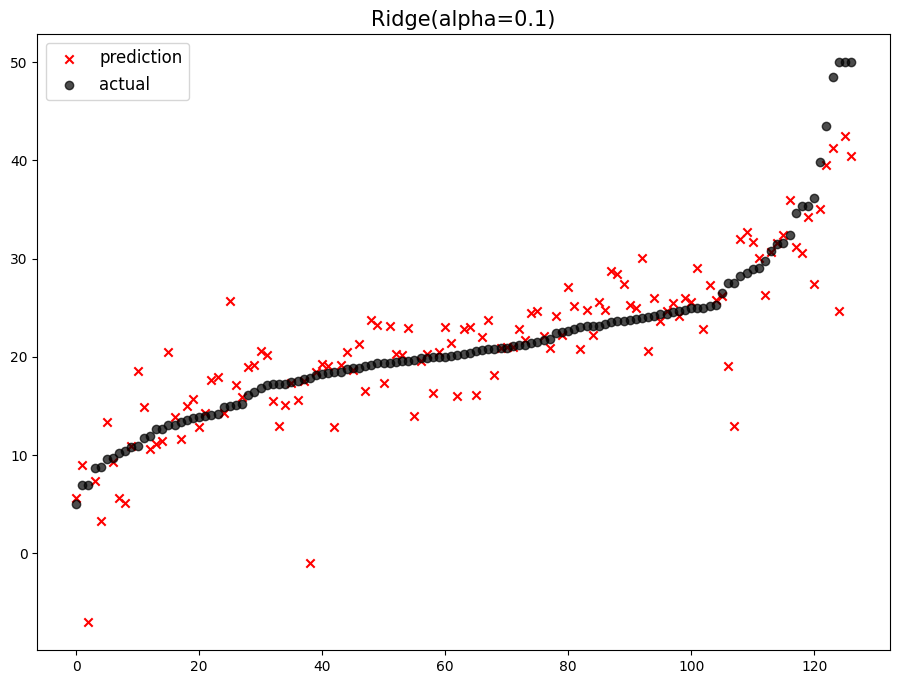

              model        mse
0  Ridge(alpha=0.1)  22.142233
1  LinearRegression  22.098695


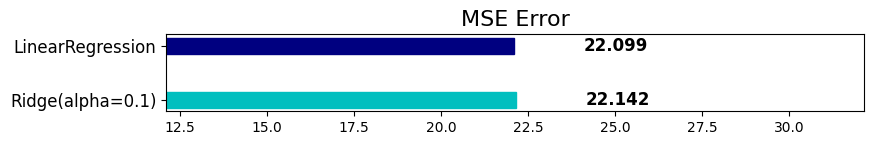

In [10]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=0.1)', pred, y_test)

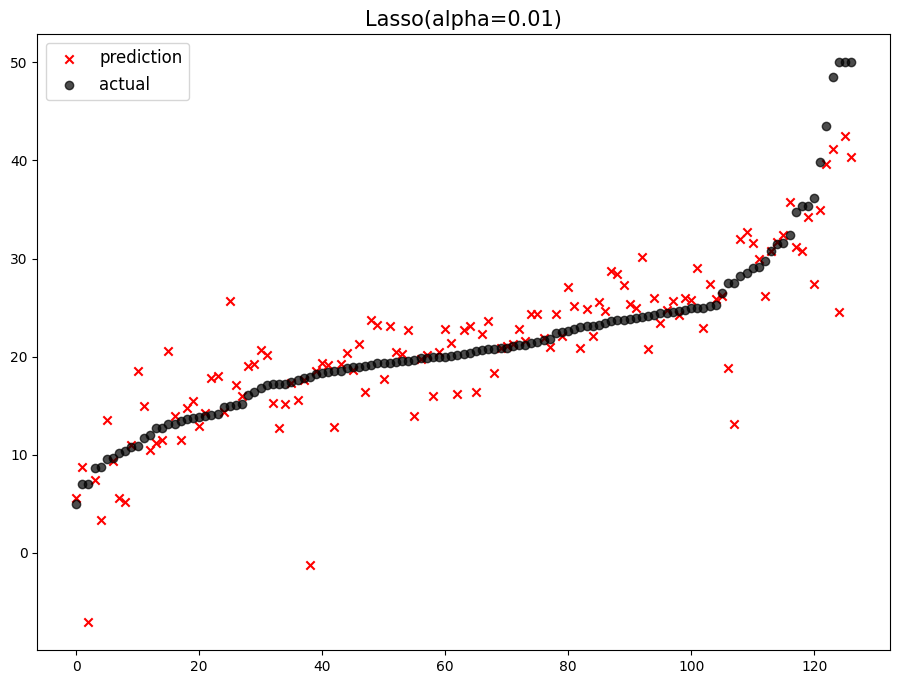

               model        mse
0  Lasso(alpha=0.01)  22.210557
1   Ridge(alpha=0.1)  22.142233
2   LinearRegression  22.098695


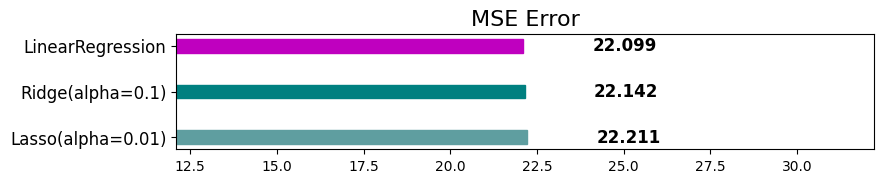

In [11]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

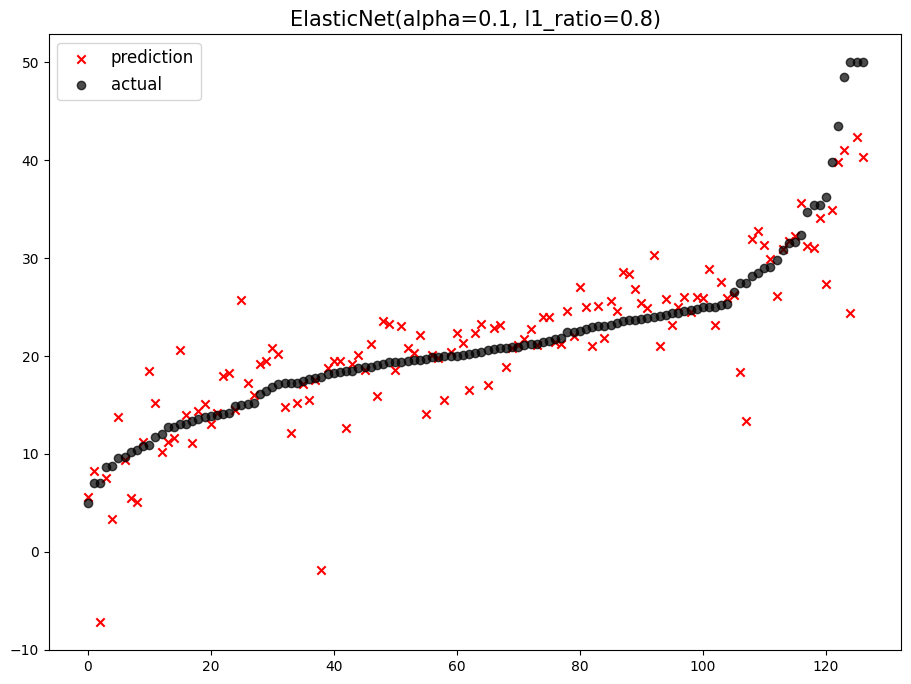

                                 model        mse
0  ElasticNet(alpha=0.1, l1_ratio=0.8)  22.509119
1                    Lasso(alpha=0.01)  22.210557
2                     Ridge(alpha=0.1)  22.142233
3                     LinearRegression  22.098695


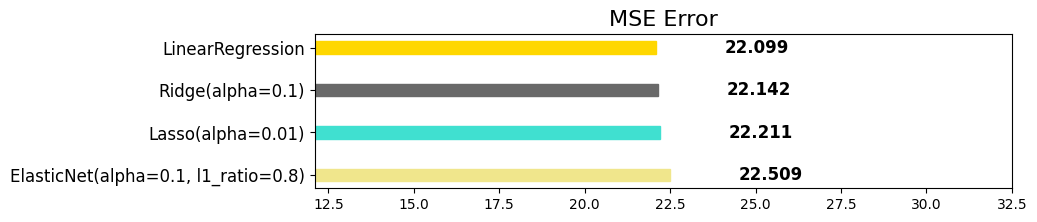

In [12]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(alpha=0.1, l1_ratio=0.8)', pred, y_test)    

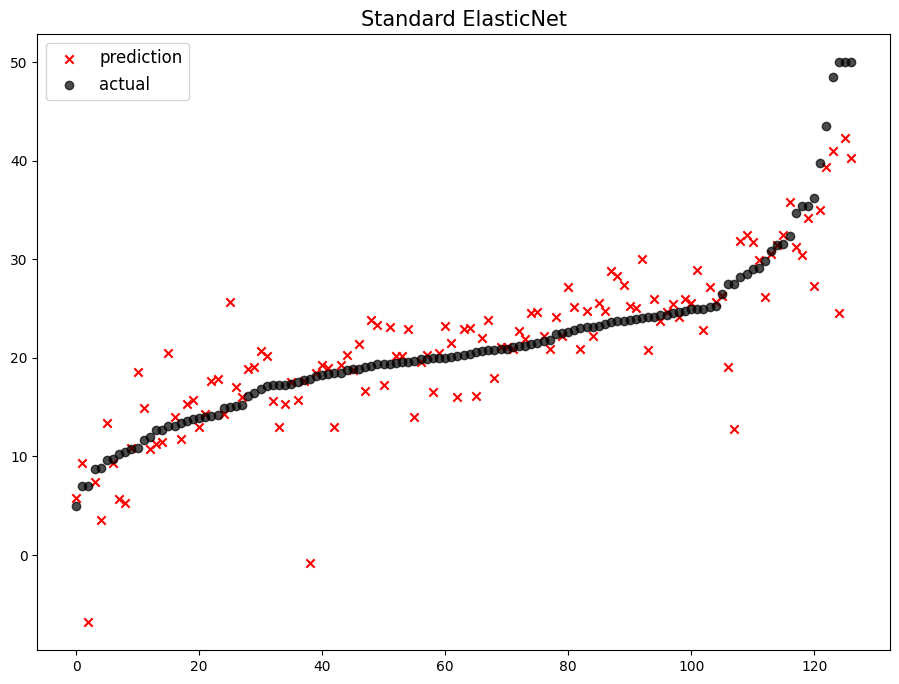

                                 model        mse
0  ElasticNet(alpha=0.1, l1_ratio=0.8)  22.509119
1                    Lasso(alpha=0.01)  22.210557
2                     Ridge(alpha=0.1)  22.142233
3                  Standard ElasticNet  22.129025
4                     LinearRegression  22.098695


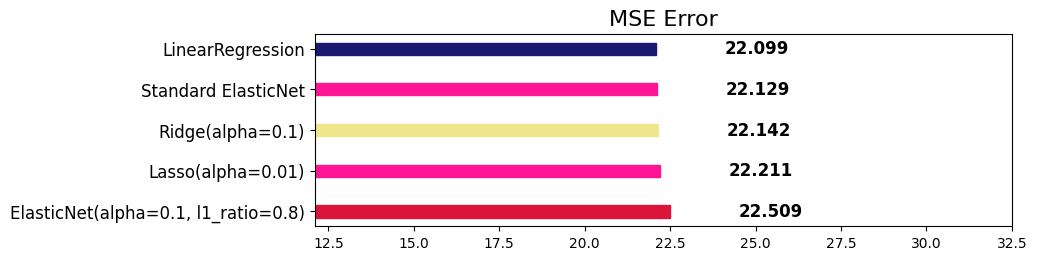

In [13]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.01, l1_ratio=0.8)
)
elasticnet_pipeline.fit(x_train, y_train)
elasticnet_pred = elasticnet_pipeline.predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/opt/conda/envs/detection/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e+03, tolerance: 3.361e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


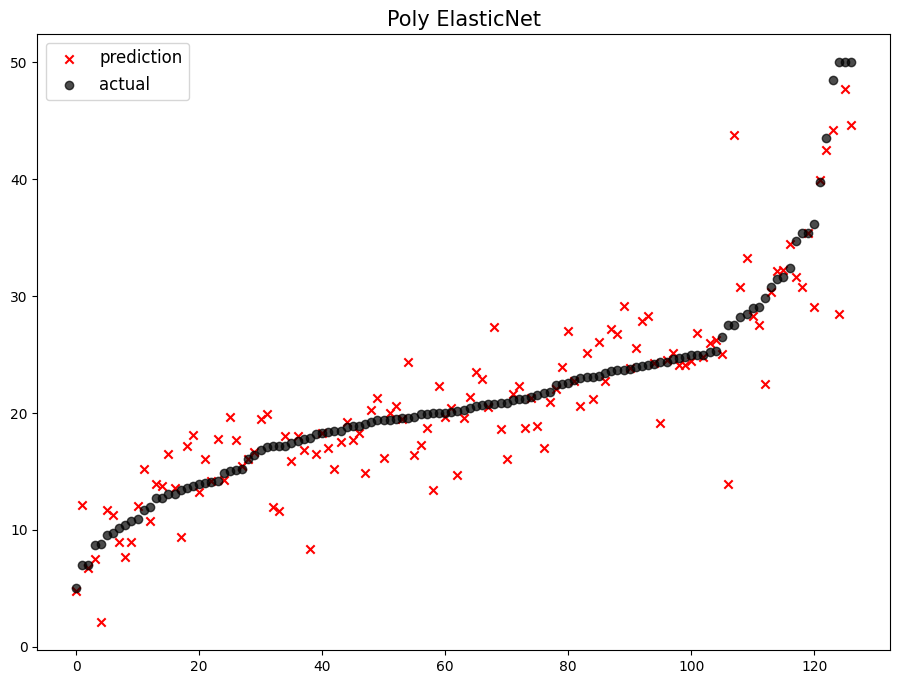

                                 model        mse
0  ElasticNet(alpha=0.1, l1_ratio=0.8)  22.509119
1                    Lasso(alpha=0.01)  22.210557
2                     Ridge(alpha=0.1)  22.142233
3                  Standard ElasticNet  22.129025
4                     LinearRegression  22.098695
5                      Poly ElasticNet  15.662572


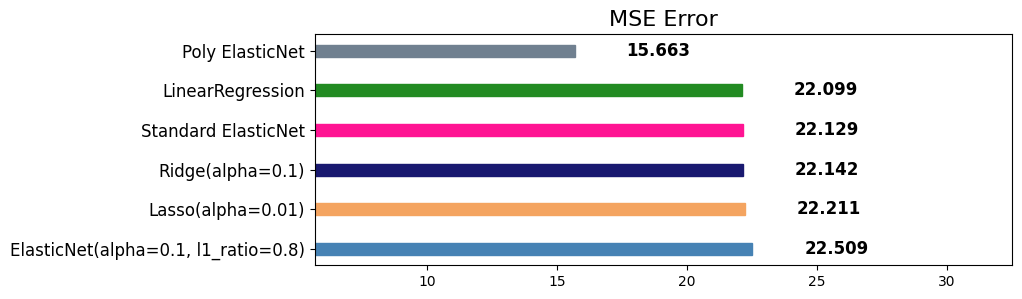

In [14]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [15]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [22]:
print(type(linear_reg))
print(poly_pipeline)

<class 'sklearn.linear_model._base.LinearRegression'>
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.2))])


In [16]:
single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet_pipeline', elasticnet_pipeline), 
    ('poly_pipeline', poly_pipeline)
]

In [23]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [25]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [24]:
voting_regressor.fit(x_train, y_train)

/opt/conda/envs/detection/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e+03, tolerance: 3.361e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


VotingRegressor(estimators=[('linear_reg', LinearRegression()),
                            ('ridge', Ridge(alpha=0.1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.01,
                                                         l1_ratio=0.8))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

In [26]:
voting_pred = voting_regressor.predict(x_test)

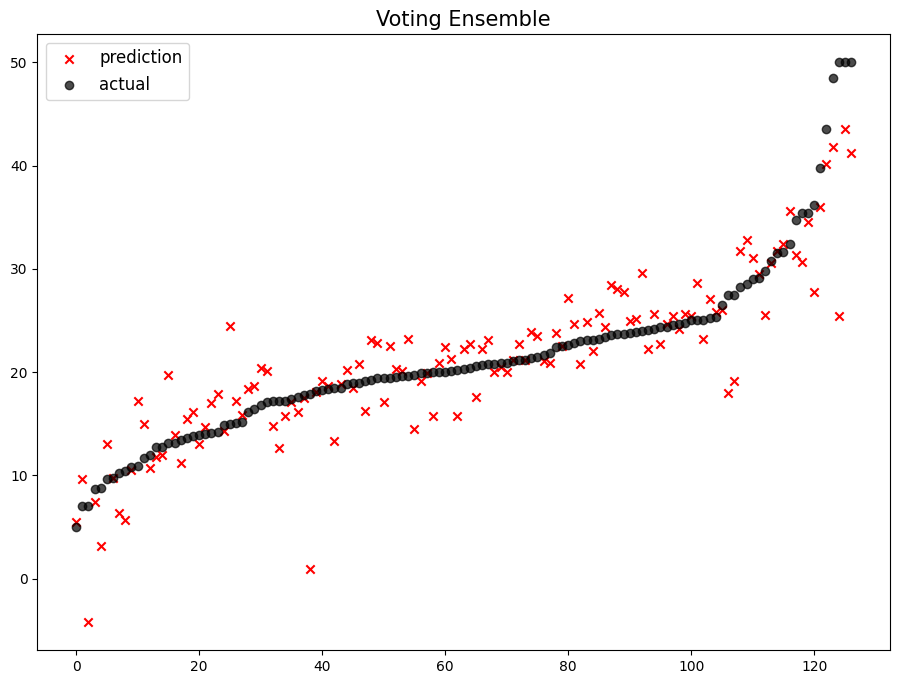

                                 model        mse
0  ElasticNet(alpha=0.1, l1_ratio=0.8)  22.509119
1                    Lasso(alpha=0.01)  22.210557
2                     Ridge(alpha=0.1)  22.142233
3                  Standard ElasticNet  22.129025
4                     LinearRegression  22.098695
5                      Voting Ensemble  18.150683
6                      Poly ElasticNet  15.662572


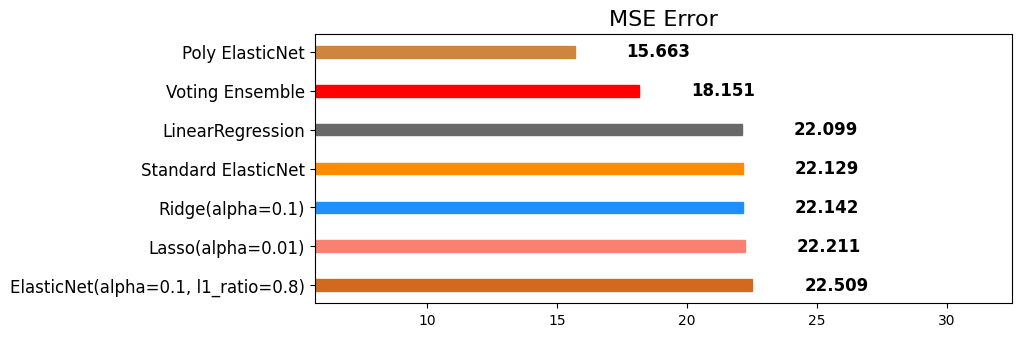

In [27]:
mse_eval('Voting Ensemble', voting_pred, y_test)